# Escolha de DJ

### Elisa Malzoni e Bruna Kimura
---------------------------------------

In [21]:
%matplotlib inline
import sys
sys.path.append('..')

from random import choice
from itertools import permutations

import pandas as pd
import networkx as nx

import socnet as sn
import numpy as np
from scipy.stats import norm, linregress

import matplotlib.pyplot as plt

In [3]:
sn.node_size = 10
sn.node_color = (255, 255, 255)

sn.edge_width = 1
sn.edge_color = (192, 192, 192)

sn.node_label_position = 'top center'

## One-mode

In [12]:
om = sn.load_graph('one-mode.gml')

sn.show_graph(om, nlab=True)

../socnet.py:59: RuntimeWarning:

divide by zero encountered in double_scalars

../socnet.py:187: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:188: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:189: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:190: RuntimeWarning:

invalid value encountered in double_scalars



## Two-mode

In [13]:
tm = sn.load_graph('two-mode.gml')

sn.show_graph(tm, nlab=True)

## Indegree do one-mode

In [60]:
sorted([[om.in_degree(n), om.nodes[n]["label"]] for n in om.nodes])

[[0, 'Ale'],
 [0, 'Joao'],
 [0, 'Paulo'],
 [0, 'Pedro'],
 [0, 'Tirta'],
 [1, 'Bruna'],
 [1, 'Carlos'],
 [1, 'Jean'],
 [2, 'Elisa'],
 [2, 'Gabs'],
 [2, 'Leo'],
 [2, 'Martim'],
 [2, 'Rios'],
 [2, 'Sabrina'],
 [3, 'Antonio'],
 [3, 'Isa'],
 [3, 'Rapha'],
 [5, 'Rachel'],
 [5, 'Vitoria'],
 [6, 'Chen'],
 [7, 'Forba'],
 [7, 'Fred'],
 [7, 'Toyama'],
 [10, 'Graicer'],
 [12, 'Hugo']]

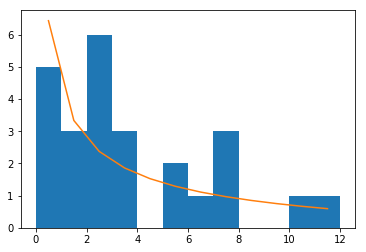

In [31]:
hist = plt.hist([om.in_degree(n) for n in om.nodes],bins=[i for i in range(13)])
xdata = [(l + r)/2 for l, r in zip(hist[1][:-1], hist[1][1:])]
ydata = [h + 1 for h in hist[0]]

reg = linregress(np.log(xdata), np.log(ydata))

plt.plot(xdata, [x ** reg[0] * np.exp(reg[1]) - 1 for x in xdata])

plt.show()

## hub e Authority do two-mode

In [80]:
estilos = ['Samba', 'MPB', 'Rap Nacional', 'Pop', 'K-pop', 'Metal', 'Indie Rock', 'Funk', 'Sertanejo', 
           'Eletronica', 'Pop Rock', 'Disco', 'Opera', 'Pagode', 'Rock classico', 'Jazz', 'J-pop']

nodes_estilo = []

for n in tm.nodes:
    if tm.nodes[n]["label"] in estilos:
        nodes_estilo.append(n)
                            
        
print(nodes_estilo)

[0, 3, 4, 5, 15, 17, 19, 22, 24, 25, 26, 28, 31, 32, 36]
